In [1]:
from numpy import transpose
import numpy as np
import random
import time
import math
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.image import imread

In [ ]:
#1-D DFT
def arrayofarray(dft):
    def inner(x):
        x = np.asarray(x, dtype=np.complex)
        if len(x.shape) == 2:
          final=[]
          for i in x:
            final.append(dft(i))
          return final
        return dft(x)
    return inner


@arrayofarray
def dft(x):
  v = np.asarray(x, dtype=np.complex)
  omga=np.exp((-2j*np.pi)/v.shape[-1])
  W=[]
  for i in range(v.shape[-1]):
    p=[]
    for j in range(v.shape[-1]):
      p.append(omga**(i*j))
    W.append(p)
  fin=list(np.matmul(W, v))
  return fin


In [ ]:
#1-D FFT
def arrayofarrays(fft):
    def inner(x):
        x=np.array(x,dtype=np.complex)
        if len(x.shape) == 2:
          final=[]
          for i in x:
            final.append(fft(i))
          return final
        return fft(x)
    return inner


@arrayofarrays
def fft(x):
  x=np.array(x,dtype=np.complex)
  N = len(x)

  if N == 1:
    return [x[0]]

  X = [0] * N

  even = fft(x[:N:2])
  odd = fft(x[1:N:2])

  for k in range(N//2):
    w = math.e**(-2j*math.pi * k/N)
    X[k] = even[k] + w * odd[k]
    X[k + N//2] = even[k] - w * odd[k]

  return X

In [ ]:
m=np.random.randint(100, size=(1024))
np.allclose(dft(m), fft(m))


<ipython-input-2-705a3e314218>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.asarray(x, dtype=np.complex)
<ipython-input-2-705a3e314218>:16: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  v = np.asarray(x, dtype=np.complex)


True

In [ ]:
m=np.random.randint(100, size=(1024))
np.allclose(dft(m), np.fft.fft(m))


<ipython-input-2-705a3e314218>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.asarray(x, dtype=np.complex)
<ipython-input-2-705a3e314218>:16: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  v = np.asarray(x, dtype=np.complex)


True

In [ ]:
m=np.random.randint(100, size=(1024))
np.allclose(dft(m),fft(m))

<ipython-input-2-705a3e314218>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.asarray(x, dtype=np.complex)
<ipython-input-2-705a3e314218>:16: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  v = np.asarray(x, dtype=np.complex)


True

[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]


<ipython-input-2-705a3e314218>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.asarray(x, dtype=np.complex)
<ipython-input-2-705a3e314218>:16: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  v = np.asarray(x, dtype=np.complex)


[0.0009274482727050781, 8.249282836914062e-05, 0.00023293495178222656, 0.0010437965393066406, 0.004470109939575195, 0.019115447998046875, 0.07716512680053711, 0.2324221134185791, 0.702085018157959, 2.7836883068084717]
[0.00010371208190917969, 0.00018715858459472656, 0.00035452842712402344, 0.0007569789886474609, 0.0015468597412109375, 0.0032601356506347656, 0.006974220275878906, 0.014793872833251953, 0.02892756462097168, 0.14598441123962402]
[2.4557113647460938e-05, 1.0967254638671875e-05, 1.049041748046875e-05, 1.1920928955078125e-05, 1.5974044799804688e-05, 2.5987625122070312e-05, 4.696846008300781e-05, 4.57763671875e-05, 6.365776062011719e-05, 6.699562072753906e-05]


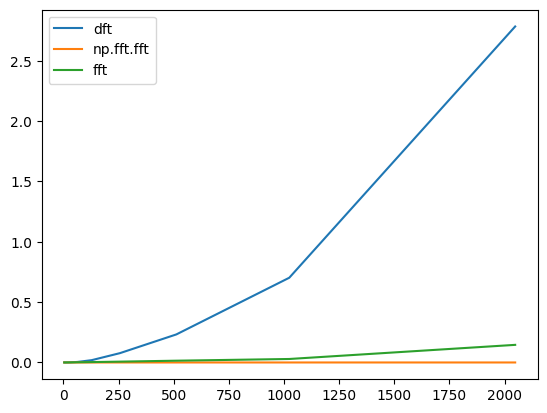

In [ ]:
entriesA=[]
entriesB=[]
tdft=[]
tfft=[]
tnpfft=[]
y=[2 ** x for x in range(2,12)]
print(y)
for i in y:
  m=np.random.randint(100, size=(i))
  n=np.random.randint(100, size=(i))
  entriesA.append(m)
  entriesB.append(n)
  begin = time.time()
  dft(m)
  end = time.time()
  tdft.append(end-begin)

  begin = time.time()
  fft(m)
  end = time.time()
  tfft.append(end-begin)

  begin = time.time()
  np.fft.fft(m)
  end = time.time()
  tnpfft.append(end-begin)
print(tdft)
print(tfft)
print(tnpfft)
plt.plot(y, tdft,  label = "dft")
plt.plot(y, tnpfft, label = "np.fft.fft")
plt.plot(y, tfft,  label = "fft")
plt.legend()
plt.show()

In [ ]:
def pointwise_mul(list1, list2):
  products=[]
  for num1, num2 in zip(list1, list2):
    products.append(num1 *num2)
  return products



In [ ]:
for i in range(len(entriesA)):
  print(pointwise_mul(fft(entriesA[i]), fft(entriesB[i])))


<ipython-input-3-53cffde24741>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:16: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)


[(65311+0j), (-791+698j), (-5353+0j), (-791-698j)]
[(169814+0j), (507.44635559958715-310.33748237198614j), (6467-7395j), (-755.446355599587+939.6625176280136j), (756-0j), (-755.4463555995868-939.6625176280138j), (6467+7395j), (507.4463555995868+310.3374823719864j)]
[(695832+0j), (-11799.048263473875+1131.2970423879315j), (4053.6810921903516-402.1821817572991j), (24426.131460032746+4642.524964833381j), (-649.9999999999995-8650j), (-494.08552222242787+16877.706551883555j), (-2847.6810921903516+4743.817818242699j), (2251.0023256635404+11458.478629438116j), (-23600+0j), (2251.002325663546-11458.478629438108j), (-2847.6810921903516-4743.817818242702j), (-494.0855222224212-16877.706551883555j), (-650.0000000000005+8650j), (24426.131460032746-4642.524964833376j), (4053.681092190352+402.18218175729976j), (-11799.048263473873-1131.2970423879397j)]
[(2756624+0j), (-5683.08026909585+6144.25172545803j), (-13721.499665951602+6316.39135660311j), (-6143.023997021151-33087.13081997543j), (-16862.23084

In [ ]:
#GENERATE LARGE PRIME NUMBERS AND VERIFY IT THROUGH MILLER-RABIN TEST
def generate_random_number(no_of_bits):
    return random.randrange(2**(no_of_bits-1)+1, 2**no_of_bits - 1)


In [ ]:
def generate_prime_list(n):
    prime_list=list()
    for i in range(1,n+1):
        if i>1:
            for j in range(2,i):
                if( i % j )==0:
                    break
            else:
                prime_list.append(i)
    return prime_list
prime_number_list=generate_prime_list(350)

In [ ]:
def low_level_prime(n):
    while True:
        num=generate_random_number(n)
        for i in prime_number_list:
            if num%i==0 and i**2<=num:
                break
            else:
                return num


In [ ]:
def Miller_Rabin(n):
	x = 0
	y = n-1
	while y % 2 == 0:
		y >>= 1
		x += 1
	assert(2**x * y == n-1)

	def trialComposite(t):
		if pow(t, y, n) == 1:
			return False
		for i in range(x):
			if pow(t, 2**i * y, n) == n-1:
				return False
		return True
	m = 20
	for i in range(m):
		t = random.randrange(2, n)
		if trialComposite(t):
			return False
	return True

In [ ]:
p_file=open('P.txt','w+')
i=100000
while i:
    P=16
    x=low_level_prime(P)
    if not Miller_Rabin(x):
        continue
    else:
        p_file.write("%d\n"%x)
        i=i-1


In [ ]:
q_file=open('Q.txt','w+')
i=100000
while i:
    Q=16
    x=low_level_prime(P)
    if not Miller_Rabin(x):
        continue
    else:
        q_file.write("%d\n"%x)
        i=i-1

In [ ]:
#RSA IMPLEMNTATION
def egcd(a, b):
    if b==0:
      return (a,1,0)
    else:
      d1, x1, y1= egcd(b, a % b)
      d= d1
      x= y1
      y= x1 - (a//b)*y1
      return (d,x,y)


In [ ]:
def modularInv(a, n):
    d, x, y = egcd(a, n)
    b=1
    if b%d==0:
        p= (x*(b/d))%n
        return p

In [ ]:
def isCoprime(a,b):
  gcd,_,_=egcd(a,b)
  return gcd==1

In [ ]:
class RSA:
    def __init__(self, size):
        a,b=self.rsa()
        self.e = b[0]
        self.n= b[1]
        self.fullset=(a,b)
        self.d=a[0]
        self.size=size
        print("public key : ", self.e)
        print("private key : ", self.d)
    def random_line(self,fname):
        lines=open(fname).read().splitlines()
        r= random.choice(lines)
        return int(r)
    def rsa(self):
        P=self.random_line("/content/P.txt")
        Q=self.random_line("/content/Q.txt")
        e=7
        tot=(P-1)*(Q-1)
        while (not isCoprime(e, tot)):
          el=[3, 5, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]
          e=random.choice(el)
        n=P*Q
        p=modularInv(e,tot)
        prikey=(p,n)

        pubkey=(e,n)
        return (prikey,pubkey)
    def encrypt(self, new):
        msgasc=[]
        for i in new:
          #print(new)
          c=str(complex(i))
          c=c[1:-1]
          # print("hi")
          # print(c)
          l=[]
          for j in c:
            l.append(ord(j))
          msgasc.append(l)
        enc=[]
        for a in msgasc:
          encs=[]
          for z in a:
            encs.append(pow(z, int(self.e), self.n))
          enc.append(encs)
        return enc
    def decrypt(self, ciph):
        b=[]
        for var in ciph:
          str1=''
          for pin in var:
            dvar=pow(pin, int(self.d), self.n)
            str1+=chr(dvar)
          b.append(str1)
        deciph=[]
        for i in b:
          deciph.append(complex(i))
        return deciph

In [ ]:
L=RSA(16)
msg=pointwise_mul(fft(entriesA[0]),fft(entriesB[0]))
a=L.encrypt(msg)
w=L.decrypt(a)
np.allclose(msg,w)

public key :  449
private key :  96858049.0


<ipython-input-3-53cffde24741>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:16: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)


True

In [ ]:
print("Message: ",msg)

Message:  [(65311+0j), (-791+698j), (-5353+0j), (-791-698j)]


In [ ]:
print("Encrypted Message:")
for i in a:
  print(i)

Encrypted Message:
[92216481, 1293008827, 916015192, 958623743, 958623743, 306146121, 464900435, 740733702]
[1462409081, 626189610, 494917123, 958623743, 306146121, 92216481, 494917123, 1185552993, 740733702]
[1462409081, 1293008827, 916015192, 1293008827, 916015192, 306146121, 464900435, 740733702]
[1462409081, 626189610, 494917123, 958623743, 1462409081, 92216481, 494917123, 1185552993, 740733702]


In [ ]:
print("Decrypted Message:",w)

Decrypted Message: [(65311+0j), (-791+698j), (-5353+0j), (-791-698j)]


In [ ]:
#Implement 1-D Inverse FFT (I-FFT) on C(x), in PV form (Interpolation) to get C(x) in Coefficient form (CR) Polynomial.
#Inverse FFT
def arrayofarrayys(ifft):
    def inner(x):
        x=np.array(x,dtype=np.complex)
        if len(x.shape) == 2:
          final=[]
          for i in x:
            final.append(ifft(i))
          return final
        return ifft(x)
    return inner


@arrayofarrayys
def ifft(x):
    x = np.asarray(x, dtype=complex)
    x_conjugate = np.conjugate(x)

    inverse = fft(x_conjugate)

    inverse = np.conjugate(inverse)
    inverse = inverse / x.shape[0]
    return inverse

In [ ]:
m=np.random.randint(100, size=(1024))
np.allclose(ifft(m), np.fft.ifft(m))


<ipython-input-24-89e58b0d1abb>:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:16: DeprecationWarning: `np.complex` is a deprecated alias for the b

True

[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
[0.0007379055023193359, 0.00011563301086425781, 0.0002067089080810547, 0.000408172607421875, 0.0008504390716552734, 0.0017392635345458984, 0.005007743835449219, 0.013715028762817383, 0.014978170394897461, 0.03647470474243164]
[1.9073486328125e-05, 7.867813110351562e-06, 6.9141387939453125e-06, 7.152557373046875e-06, 7.867813110351562e-06, 9.775161743164062e-06, 2.7418136596679688e-05, 2.2411346435546875e-05, 2.5510787963867188e-05, 4.9591064453125e-05]


<ipython-input-24-89e58b0d1abb>:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:16: DeprecationWarning: `np.complex` is a deprecated alias for the b

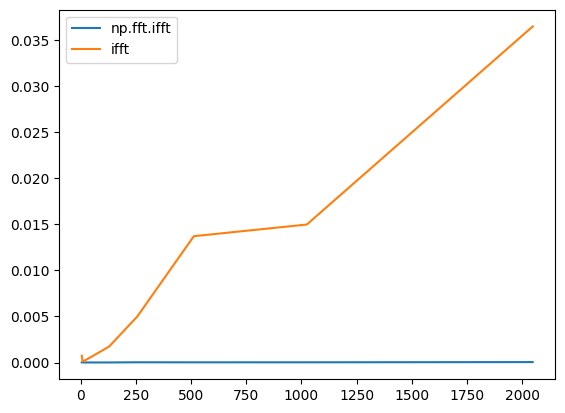

In [ ]:
tifft=[]
tnpifft=[]
y=[2 ** x for x in range(2,12)]
print(y)
for i in y:
  m=np.random.randint(100, size=(i))
  n=np.random.randint(100, size=(i))
  entriesA.append(m)
  entriesB.append(n)

  begin = time.time()
  ifft(m)
  end = time.time()
  tifft.append(end-begin)

  begin = time.time()
  np.fft.ifft(m)
  end = time.time()
  tnpifft.append(end-begin)

print(tifft)
print(tnpifft)
plt.plot(y, tnpifft, label = "np.fft.ifft")
plt.plot(y, tifft,  label = "ifft")
plt.legend()
plt.show()

In [ ]:
#takes A(x) and B(x) in n CR form and outputs C(x)=A(x)*B(x) in CR form
def fast_multiplication(arr1, arr2):
  n=len(arr1)
  for i in range(n, 2*n):
    arr1.append(0)
    arr2.append(0)
  arr3=np.asarray(fft(arr1), dtype=complex)
  arr4=np.asarray(fft(arr2), dtype=complex)
  products=pointwise_mul(arr3, arr4)
  return np.round(ifft(products))

In [ ]:
#Convolution for loop
def c_in_cr(arr1, arr2):
  convol=[0]*len(arr1)*2
  for i in range(len(arr1)):
    for j in range(len(arr2)):
      convol[i+j]+=arr1[i]*arr2[j]
  return convol


In [ ]:
np.allclose(fast_multiplication([2,1,0,0], [2,1,0,0]),c_in_cr([2,1,0,0], [2,1,0,0]))

<ipython-input-3-53cffde24741>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:16: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-24-89e58b0d1abb>:5: DeprecationWarning: `np.complex` is a deprecated alias for the b

True

<ipython-input-3-53cffde24741>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:16: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-24-89e58b0d1abb>:5: DeprecationWarning: `np.complex` is a deprecated alias for the b

20
10


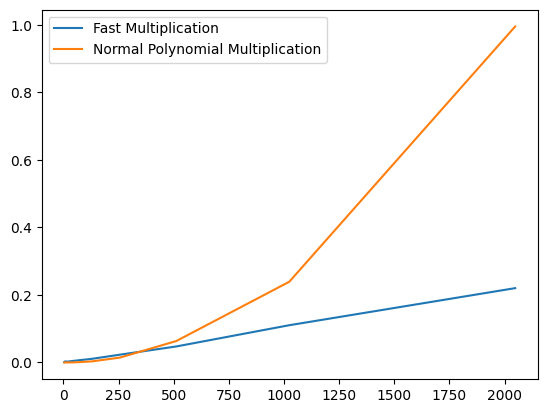

In [ ]:
plotx=[]
plotxslo=[]
y=[2 ** x for x in range(2,12)]
entriesA1=[]
entriesB1=[]
for i in y:
  m=np.random.randint(100, size=(i))
  n=np.random.randint(100, size=(i))
  entriesA1.append(m)
  entriesB1.append(n)
for i in range(len(entriesA1)):
  begin=time.time()
  fast_multiplication(list(entriesA1[i]), list(entriesB1[i]))
  end=time.time()
  plotx.append(end-begin)

  begin=time.time()
  c_in_cr(list(entriesA[i]), list(entriesB[i]))
  end=time.time()
  plotxslo.append(end-begin)
print(len(entriesA))
print(len(plotx))
plt.plot(y, plotx,  label = "Fast Multiplication")
plt.plot(y, plotxslo,  label = "Normal Polynomial Multiplication")
plt.legend()
plt.show()

In [ ]:
#2D FFT
def fft2_d(matrix):
   fftRows = np.asarray([np.fft.fft(row) for row in matrix],dtype=np.complex_)
   fftColumns=np.asarray(transpose([np.fft.fft(column) for column in transpose(fftRows)]),dtype=np.complex_)
   return fftColumns



In [ ]:
a =np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
fft2_d(a)

array([[ 36.+0.j,  -4.+4.j,  -4.+0.j,  -4.-4.j],
       [-16.+0.j,   0.+0.j,   0.+0.j,   0.+0.j]])

In [ ]:
np.fft.fft2(a)

array([[ 36.+0.j,  -4.+4.j,  -4.+0.j,  -4.-4.j],
       [-16.+0.j,   0.+0.j,   0.+0.j,   0.+0.j]])

In [ ]:
np.allclose(fft2_d(a), np.fft.fft2(a))

True

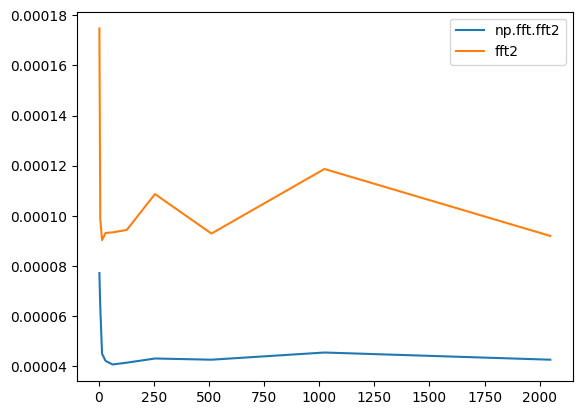

In [ ]:
ntfft2=[]
tfft2=[]
for i in y:
  m=np.array([[1,2,3,4,5,6,7,8,9,10,11,12],[13,14,15,16,17,18,19,20,21,22,23,24]])
  begin = time.time()
  fft2_d(m)
  end = time.time()
  tfft2.append(end-begin)
  begin = time.time()
  np.fft.fft2(m)
  end = time.time()
  ntfft2.append(end-begin)


plt.plot(y,ntfft2,label="np.fft.fft2")
plt.plot(y, tfft2,  label = "fft2")
plt.legend()
plt.show()

In [ ]:
#2-D Inverse FFT
def ifft2d(matrix):
   fftRows = np.asarray([ifft(row) for row in matrix],dtype=np.complex_)
   fftcolumns=np.asarray(transpose([ifft(column) for column in transpose(fftRows)]),dtype=np.complex_)
   return fftcolumns

In [ ]:
np.allclose(ifft2d(a), np.fft.ifft2(a))


<ipython-input-24-89e58b0d1abb>:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:16: DeprecationWarning: `np.complex` is a deprecated alias for the b

True

<ipython-input-24-89e58b0d1abb>:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:16: DeprecationWarning: `np.complex` is a deprecated alias for the b

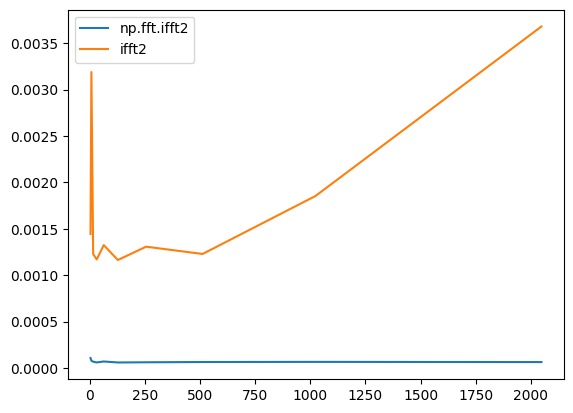

In [ ]:
ntifft2=[]
tifft2=[]
for i in y:
  m=np.array([[1,2,3,4,5,6,7,8,9,10,11,12],[13,14,15,16,17,18,19,20,21,22,23,24]])
  begin = time.time()
  ifft2d(m)
  end = time.time()
  tifft2.append(end-begin)
  begin = time.time()
  np.fft.ifft2(m)
  end = time.time()
  ntifft2.append(end-begin)


plt.plot(y,ntifft2,label="np.fft.ifft2")
plt.plot(y, tifft2,  label = "ifft2")
plt.legend()
plt.show()

<ipython-input-24-89e58b0d1abb>:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:16: DeprecationWarning: `np.complex` is a deprecated alias for the b

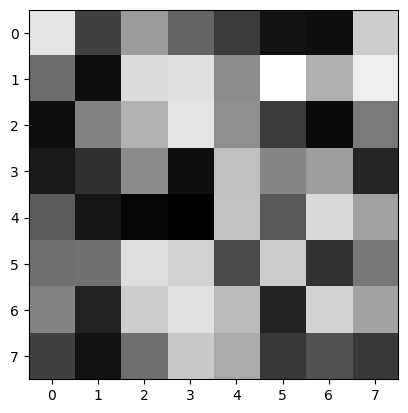

In [ ]:
#Verifying Step (vii) correctness on a Grayscale matrix ( which has random integer values in the range 0-255; 255 → White & 0 → Black))
#A = np.reshape(np.random.random(4*4),(4,4))
A = np.random.randint(0,256,(8,8))
y_A = fft2_d(A).real
y_c = np.fft.fft2(A)
A_c = ifft2d(y_A)
A_y=np.fft.ifft2(A)
plt.imshow(A,"gray")

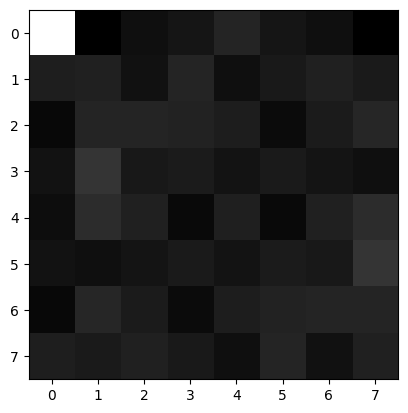

In [ ]:
check_2dfft=(y_A).real
plt.imshow(check_2dfft,"gray")

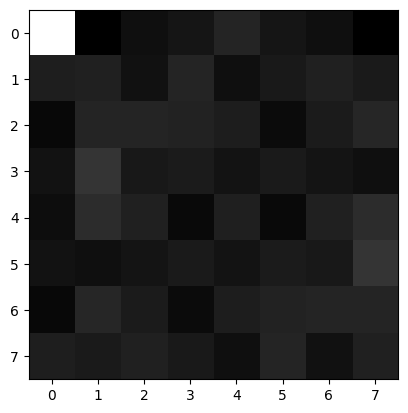

In [ ]:
check_np_2dfft=(y_c).real
plt.imshow(check_np_2dfft,"gray")

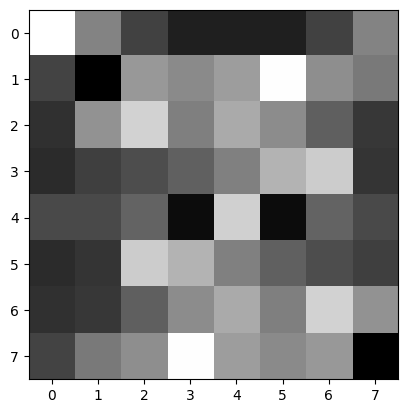

In [ ]:
check_2difft=(A_c).real
plt.imshow(check_2difft,"gray")

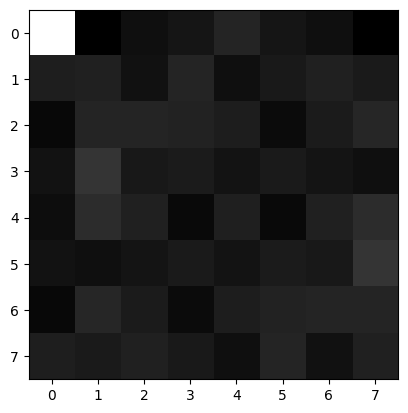

In [ ]:
check_np_2difft=(A_y).real
plt.imshow(check_np_2difft,"gray")

In [ ]:
#Apply your 2D-FFT on TIFF/JPG (lossless) Grayscale image and drop Fourier coefficients below some specified magnitude and save the 2D- image to a new file.and Apply 2D I-FFT, on the Quantized Grayscale image and render it to observe Image Quality.
from PIL import Image
from matplotlib.image import imread
import matplotlib.pyplot as plt

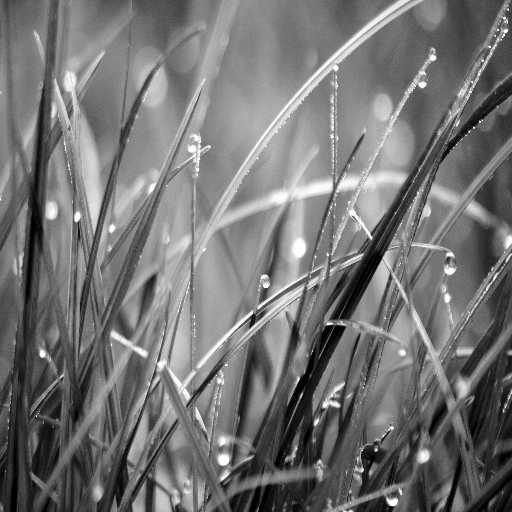

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('img3.jpg',0)
resize_img = cv2.resize(img ,(512,512))
cv2_imshow(resize_img)

In [ ]:
def compress(img, cmpr):
 # print(img.shape)
  b=fft2_d(img)
  print(b[0])
  b_sort=np.sort(np.abs(b.ravel()))
  thresh=b_sort[round(abs(np.floor(((1-cmpr)*len(b_sort)))))]
  print(thresh)
  print(max(b.ravel()))
  b=b.ravel()
  for i in range(len(b)):
    if abs(b[i])< thresh:
      b[i] = 0
  #np.testing.assert_array_equal(abs(np.fft.ifft2(b.reshape(img.shape))),img)
  plt.imshow(abs(ifft2d(b.reshape(img.shape))), "gray")

[ 1.16866322e+09       +0.j         -1.16791534e+08-29742464.1648853j
 -4.58009161e+07+29654484.89383573j ... -1.91916986e+07+24128940.92580096j
 -4.58009161e+07-29654484.89383573j -1.16791534e+08+29742464.1648853j ]
25049.36023580837
(1168663225+0j)


<ipython-input-24-89e58b0d1abb>:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:16: DeprecationWarning: `np.complex` is a deprecated alias for the b

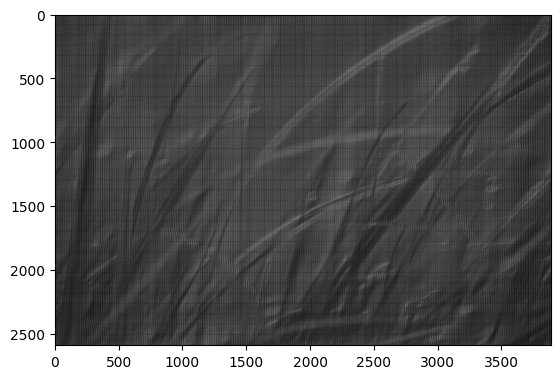

In [ ]:
compress(img, .1)

[ 1.16866322e+09       +0.j         -1.16791534e+08-29742464.1648853j
 -4.58009161e+07+29654484.89383573j ... -1.91916986e+07+24128940.92580096j
 -4.58009161e+07-29654484.89383573j -1.16791534e+08+29742464.1648853j ]
142042.92439054992
(1168663225+0j)


<ipython-input-24-89e58b0d1abb>:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:16: DeprecationWarning: `np.complex` is a deprecated alias for the b

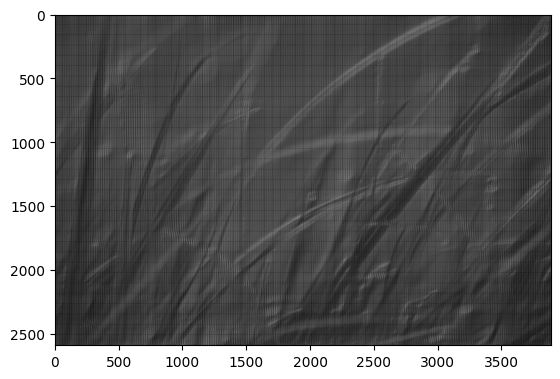

In [ ]:
compress(img,.01)

[ 1.16866322e+09       +0.j         -1.16791534e+08-29742464.1648853j
 -4.58009161e+07+29654484.89383573j ... -1.91916986e+07+24128940.92580096j
 -4.58009161e+07-29654484.89383573j -1.16791534e+08+29742464.1648853j ]
1033264.4130827751
(1168663225+0j)


<ipython-input-24-89e58b0d1abb>:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:16: DeprecationWarning: `np.complex` is a deprecated alias for the b

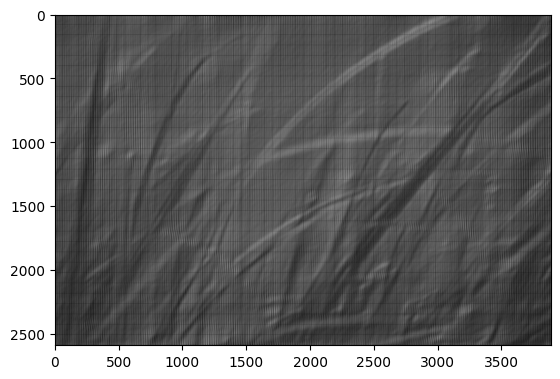

In [ ]:
compress(img,.001)

[ 1.16866322e+09       +0.j         -1.16791534e+08-29742464.1648853j
 -4.58009161e+07+29654484.89383573j ... -1.91916986e+07+24128940.92580096j
 -4.58009161e+07-29654484.89383573j -1.16791534e+08+29742464.1648853j ]
4916059.456773171
(1168663225+0j)


<ipython-input-24-89e58b0d1abb>:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:16: DeprecationWarning: `np.complex` is a deprecated alias for the b

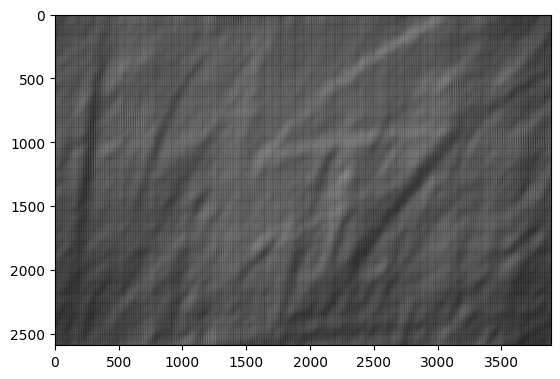

In [ ]:
compress(img,.0001)

[ 1.16866322e+09       +0.j         -1.16791534e+08-29742464.1648853j
 -4.58009161e+07+29654484.89383573j ... -1.91916986e+07+24128940.92580096j
 -4.58009161e+07-29654484.89383573j -1.16791534e+08+29742464.1648853j ]
15947145.41579852
(1168663225+0j)


<ipython-input-24-89e58b0d1abb>:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:16: DeprecationWarning: `np.complex` is a deprecated alias for the b

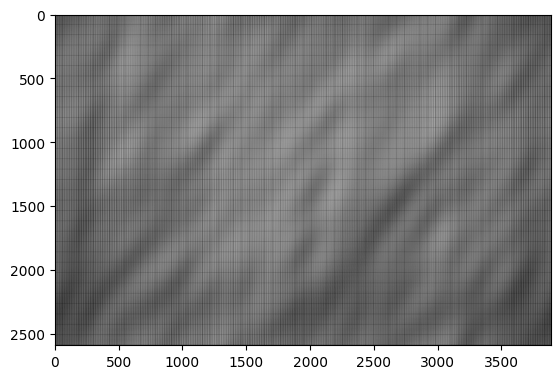

In [ ]:
compress(img,.00001)

[ 3.03733380e+07+0.00000000e+00j -3.03026218e+06-7.85880986e+05j
 -1.19943154e+06+7.59092101e+05j -4.86637549e+05-6.34972058e+05j
 -4.81090083e+05-1.06256799e+05j  8.94169781e+04+4.72738293e+05j
  8.81654515e+04-2.52631111e+05j  5.35457037e+05-4.11066033e+05j
  2.73388629e+05-3.83606827e+05j  4.30518032e+05-3.76890404e+04j
 -3.59502196e+04-1.64279547e+05j  3.12371465e+04-2.06131419e+05j
  1.37764870e+04-3.21064491e+05j -1.86077379e+05-4.90534290e+03j
 -3.43996740e+04+1.25411835e+05j -7.37083768e+04+2.39059395e+05j
  1.30410233e+05-1.41607538e+05j  6.41336992e+04-3.65513218e+04j
 -4.05249580e+04+6.47428010e+03j  5.43558537e+04-1.15100274e+05j
 -4.34890785e+04+2.73076908e+04j -7.77613508e+04-2.93514288e+04j
  1.37504543e+05+1.29421764e+04j  2.04868492e+05-2.44936769e+05j
 -5.59398545e+04+3.70967772e+04j -3.59422105e+04+1.29523037e+05j
  1.07954674e+05-1.36441760e+05j -7.26015612e+04-7.25950543e+04j
  5.00943181e+04-2.17907311e+05j  6.87739807e+04-6.37763918e+04j
 -3.29224385e+04-1.177951

<ipython-input-24-89e58b0d1abb>:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:16: DeprecationWarning: `np.complex` is a deprecated alias for the b

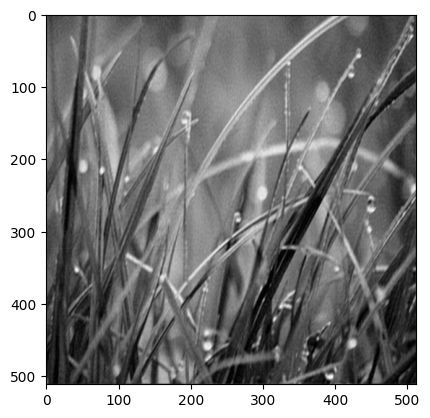

In [ ]:
compress(resize_img, .1)

[ 3.03733380e+07+0.00000000e+00j -3.03026218e+06-7.85880986e+05j
 -1.19943154e+06+7.59092101e+05j -4.86637549e+05-6.34972058e+05j
 -4.81090083e+05-1.06256799e+05j  8.94169781e+04+4.72738293e+05j
  8.81654515e+04-2.52631111e+05j  5.35457037e+05-4.11066033e+05j
  2.73388629e+05-3.83606827e+05j  4.30518032e+05-3.76890404e+04j
 -3.59502196e+04-1.64279547e+05j  3.12371465e+04-2.06131419e+05j
  1.37764870e+04-3.21064491e+05j -1.86077379e+05-4.90534290e+03j
 -3.43996740e+04+1.25411835e+05j -7.37083768e+04+2.39059395e+05j
  1.30410233e+05-1.41607538e+05j  6.41336992e+04-3.65513218e+04j
 -4.05249580e+04+6.47428010e+03j  5.43558537e+04-1.15100274e+05j
 -4.34890785e+04+2.73076908e+04j -7.77613508e+04-2.93514288e+04j
  1.37504543e+05+1.29421764e+04j  2.04868492e+05-2.44936769e+05j
 -5.59398545e+04+3.70967772e+04j -3.59422105e+04+1.29523037e+05j
  1.07954674e+05-1.36441760e+05j -7.26015612e+04-7.25950543e+04j
  5.00943181e+04-2.17907311e+05j  6.87739807e+04-6.37763918e+04j
 -3.29224385e+04-1.177951

<ipython-input-24-89e58b0d1abb>:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:16: DeprecationWarning: `np.complex` is a deprecated alias for the b

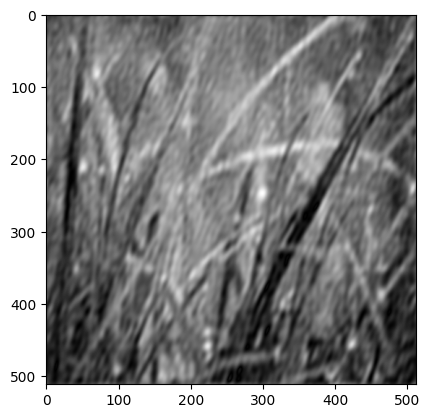

In [ ]:
compress(resize_img, .01)

[ 3.03733380e+07+0.00000000e+00j -3.03026218e+06-7.85880986e+05j
 -1.19943154e+06+7.59092101e+05j -4.86637549e+05-6.34972058e+05j
 -4.81090083e+05-1.06256799e+05j  8.94169781e+04+4.72738293e+05j
  8.81654515e+04-2.52631111e+05j  5.35457037e+05-4.11066033e+05j
  2.73388629e+05-3.83606827e+05j  4.30518032e+05-3.76890404e+04j
 -3.59502196e+04-1.64279547e+05j  3.12371465e+04-2.06131419e+05j
  1.37764870e+04-3.21064491e+05j -1.86077379e+05-4.90534290e+03j
 -3.43996740e+04+1.25411835e+05j -7.37083768e+04+2.39059395e+05j
  1.30410233e+05-1.41607538e+05j  6.41336992e+04-3.65513218e+04j
 -4.05249580e+04+6.47428010e+03j  5.43558537e+04-1.15100274e+05j
 -4.34890785e+04+2.73076908e+04j -7.77613508e+04-2.93514288e+04j
  1.37504543e+05+1.29421764e+04j  2.04868492e+05-2.44936769e+05j
 -5.59398545e+04+3.70967772e+04j -3.59422105e+04+1.29523037e+05j
  1.07954674e+05-1.36441760e+05j -7.26015612e+04-7.25950543e+04j
  5.00943181e+04-2.17907311e+05j  6.87739807e+04-6.37763918e+04j
 -3.29224385e+04-1.177951

<ipython-input-24-89e58b0d1abb>:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:16: DeprecationWarning: `np.complex` is a deprecated alias for the b

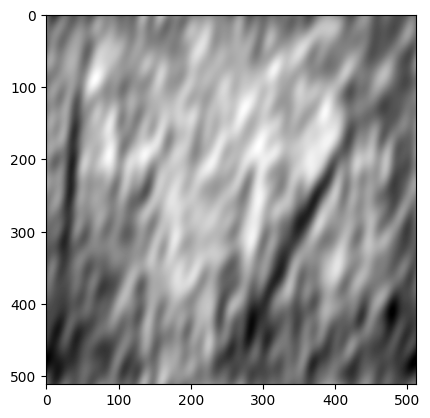

In [ ]:
compress(resize_img, .001)

[ 3.03733380e+07+0.00000000e+00j -3.03026218e+06-7.85880986e+05j
 -1.19943154e+06+7.59092101e+05j -4.86637549e+05-6.34972058e+05j
 -4.81090083e+05-1.06256799e+05j  8.94169781e+04+4.72738293e+05j
  8.81654515e+04-2.52631111e+05j  5.35457037e+05-4.11066033e+05j
  2.73388629e+05-3.83606827e+05j  4.30518032e+05-3.76890404e+04j
 -3.59502196e+04-1.64279547e+05j  3.12371465e+04-2.06131419e+05j
  1.37764870e+04-3.21064491e+05j -1.86077379e+05-4.90534290e+03j
 -3.43996740e+04+1.25411835e+05j -7.37083768e+04+2.39059395e+05j
  1.30410233e+05-1.41607538e+05j  6.41336992e+04-3.65513218e+04j
 -4.05249580e+04+6.47428010e+03j  5.43558537e+04-1.15100274e+05j
 -4.34890785e+04+2.73076908e+04j -7.77613508e+04-2.93514288e+04j
  1.37504543e+05+1.29421764e+04j  2.04868492e+05-2.44936769e+05j
 -5.59398545e+04+3.70967772e+04j -3.59422105e+04+1.29523037e+05j
  1.07954674e+05-1.36441760e+05j -7.26015612e+04-7.25950543e+04j
  5.00943181e+04-2.17907311e+05j  6.87739807e+04-6.37763918e+04j
 -3.29224385e+04-1.177951

<ipython-input-24-89e58b0d1abb>:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:16: DeprecationWarning: `np.complex` is a deprecated alias for the b

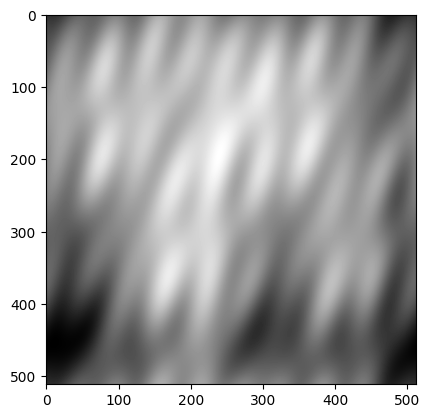

In [ ]:
compress(resize_img, .0001)

[ 3.03733380e+07+0.00000000e+00j -3.03026218e+06-7.85880986e+05j
 -1.19943154e+06+7.59092101e+05j -4.86637549e+05-6.34972058e+05j
 -4.81090083e+05-1.06256799e+05j  8.94169781e+04+4.72738293e+05j
  8.81654515e+04-2.52631111e+05j  5.35457037e+05-4.11066033e+05j
  2.73388629e+05-3.83606827e+05j  4.30518032e+05-3.76890404e+04j
 -3.59502196e+04-1.64279547e+05j  3.12371465e+04-2.06131419e+05j
  1.37764870e+04-3.21064491e+05j -1.86077379e+05-4.90534290e+03j
 -3.43996740e+04+1.25411835e+05j -7.37083768e+04+2.39059395e+05j
  1.30410233e+05-1.41607538e+05j  6.41336992e+04-3.65513218e+04j
 -4.05249580e+04+6.47428010e+03j  5.43558537e+04-1.15100274e+05j
 -4.34890785e+04+2.73076908e+04j -7.77613508e+04-2.93514288e+04j
  1.37504543e+05+1.29421764e+04j  2.04868492e+05-2.44936769e+05j
 -5.59398545e+04+3.70967772e+04j -3.59422105e+04+1.29523037e+05j
  1.07954674e+05-1.36441760e+05j -7.26015612e+04-7.25950543e+04j
  5.00943181e+04-2.17907311e+05j  6.87739807e+04-6.37763918e+04j
 -3.29224385e+04-1.177951

<ipython-input-24-89e58b0d1abb>:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=np.array(x,dtype=np.complex)
<ipython-input-3-53cffde24741>:16: DeprecationWarning: `np.complex` is a deprecated alias for the b

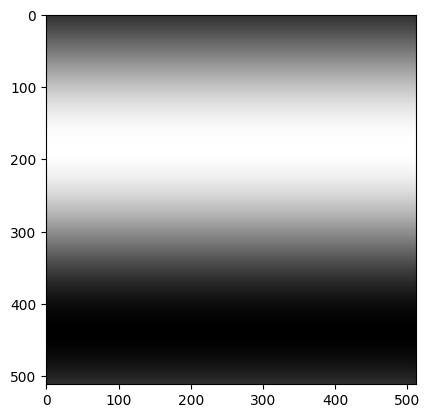

In [ ]:
compress(resize_img, .00001)